## <span style="color: limegreen;">READ ME</span>

###          Concrete strength is very important when it comes to designing and laying out blueprints for civil and industrial work. Concrete has been a very important material throughout the years dating way back to the roman empire. For centuries there have been different types of concrete from using different types of materials to strengthen and take an approach to making better well-made concrete. Although it sounds simple on paper, there are many difficulties when it comes to making a mix for high performance concrete. There are many factors that can conclude if a batch of mix is well suited for high performance use. For example, its long-term use, the yield stress, plastic viscosity, mix design, the strength of the concrete, and overall quality. The ratio between high and low performance is quite different when it comes to using certain materials and measurements but why is this?

### 	High performance concrete is not as simple as low performance concrete. Is it because of the quality of the material? Not quite, it primarily points towards the ratios and measurements of what materials are used. When it comes to making high performance concrete what is very important is the “Mix Design” for HPC (High Performance Concrete).  	There are many behaviors that affect how concrete will perform based on the mix design used. This is hat complicates and puts bumps towards making a strong high performance concrete. Where this comes into play is the strength of cement- aggregate where the mix between many variables like water ash, cement, and age can be less clear towards making HPC. 
### 	Another point that is very critical in producing HPC is the material content. There are many different types of concretes that have evolved and changed throughout history, for example back during the roman empire are famous for having made on of the strongest HPC. With their supply of volcanic rock due to their geographic location they were able to make concrete very strong due to the minerals and properties that they had put into it. This led to high quality durable concrete that was used for architectural means as proven with their amazing structural work like the Roman Colosseum and their art in forms of statues. So how does this translate to modern day concrete mix? Well for experimental and project reasons we use Cement, blast furnace slag, water, coarse aggregate, fine aggregate, and many other materials which are the building blocks to making and achieving High Performance Concrete. Although we have the material available it still leads back to the amount and measurements of how much is needed. Plus, the process for making HPC with machine work needs to be programmed so there is no error, but that is a whole other facet of the process towards achieving high performance concrete.
### To conclude, high performance concrete is a very tedious and difficult process. Which has many variables that play major roles in the high-performance concrete. With one of the most important points being the measurements and mix design for the HPC being complicated for having to know how much water to cement ratio there needs to be. As well as using quality material to ensure durable concrete that can be used for projects of any type of liking. There can be many bumps and difficulties along the way but making high performance concrete is a mist in our modern age.


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures

In [80]:
concrete = pd.read_csv('concrete data.csv')
concrete.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [81]:
# Rename columns if necessary (example names)
concretev2 = concrete.columns = [
    'Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
    'CoarseAggregate', 'FineAggregate', 'Age', 'CompressiveStrength'
]
concrete.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [82]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cement               1030 non-null   float64
 1   BlastFurnaceSlag     1030 non-null   float64
 2   FlyAsh               1030 non-null   float64
 3   Water                1030 non-null   float64
 4   Superplasticizer     1030 non-null   float64
 5   CoarseAggregate      1030 non-null   float64
 6   FineAggregate        1030 non-null   float64
 7   Age                  1030 non-null   int64  
 8   CompressiveStrength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [83]:
concrete.describe()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [84]:
print(concrete.isnull().sum())

Cement                 0
BlastFurnaceSlag       0
FlyAsh                 0
Water                  0
Superplasticizer       0
CoarseAggregate        0
FineAggregate          0
Age                    0
CompressiveStrength    0
dtype: int64


## <span style="color: blue;">EXPLORATORY DATA ANALYSIS</span>

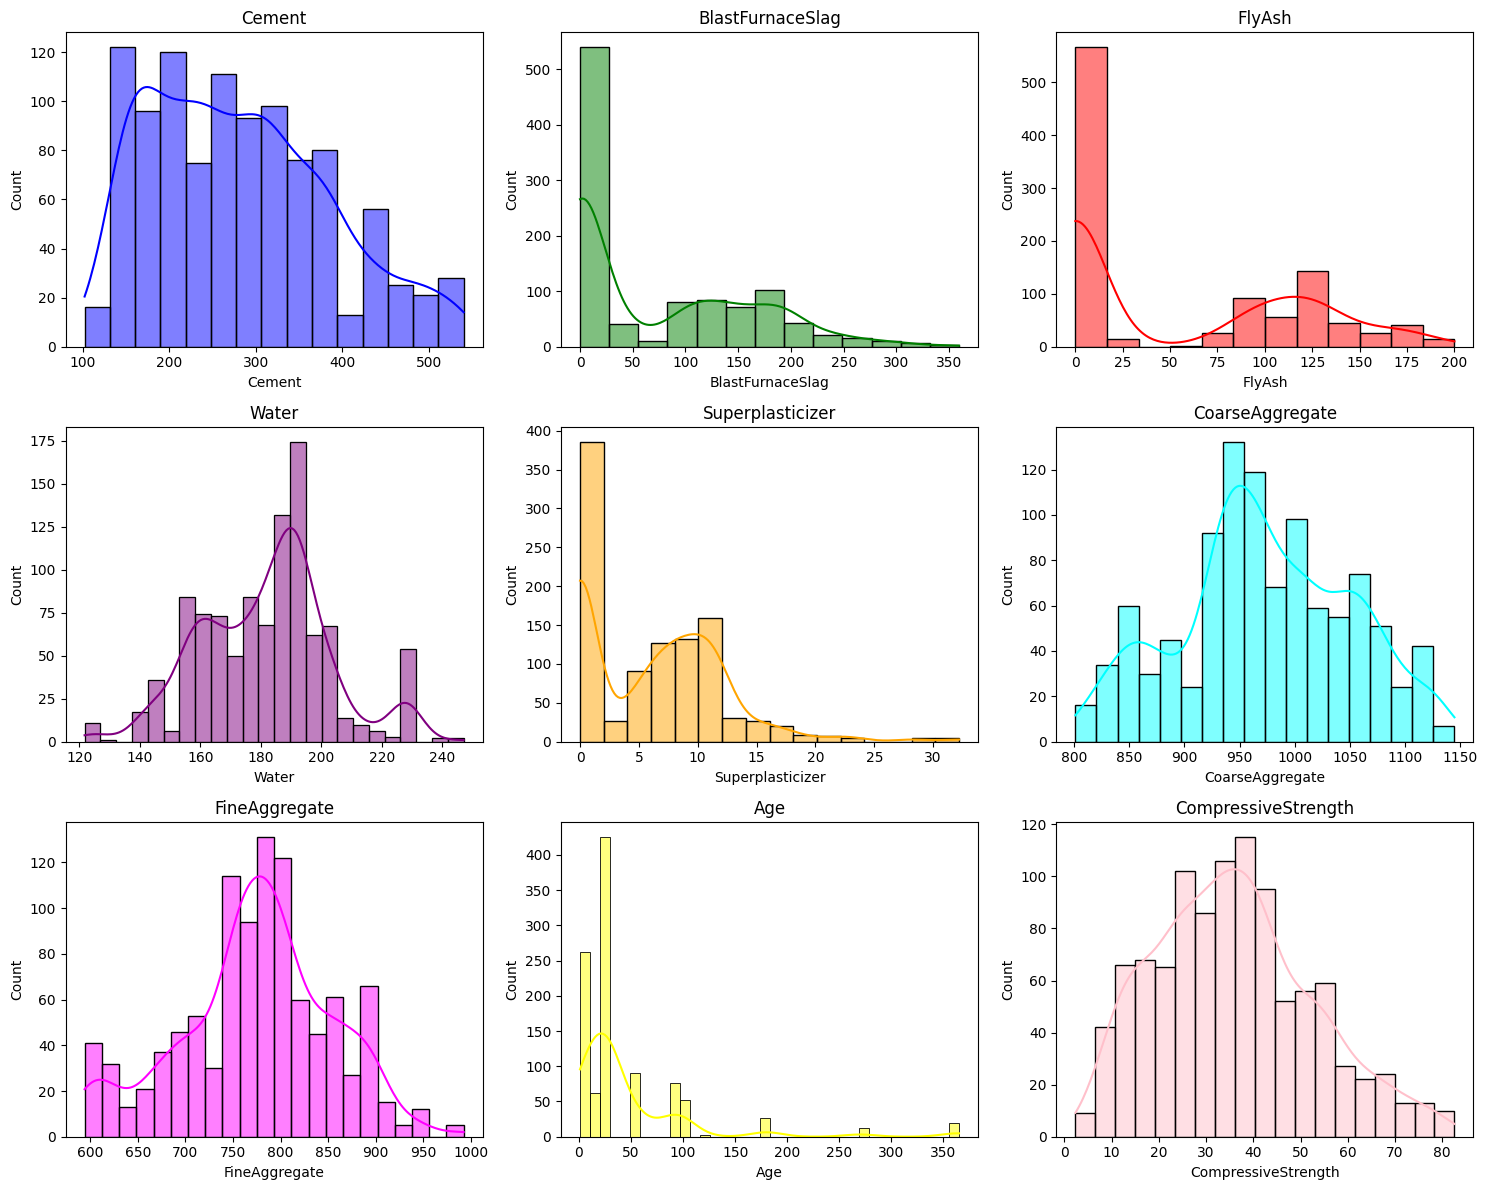

In [85]:
# Define a list of colors
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'pink']

# Determine the number of rows and columns for the grid
num_cols = 3  # Number of columns in the grid
num_rows = (len(concrete.columns) + num_cols - 1) // num_cols  # Calculate rows dynamically

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))

# Flatten the axes array to make it easy to iterate
axes = axes.flatten()

# Plot each histogram
for i, col in enumerate(concrete.columns):
    sns.histplot(concrete[col], kde=True, color=colors[i % len(colors)], ax=axes[i])
    axes[i].set_title(col)

# Turn off unused subplots (if any)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

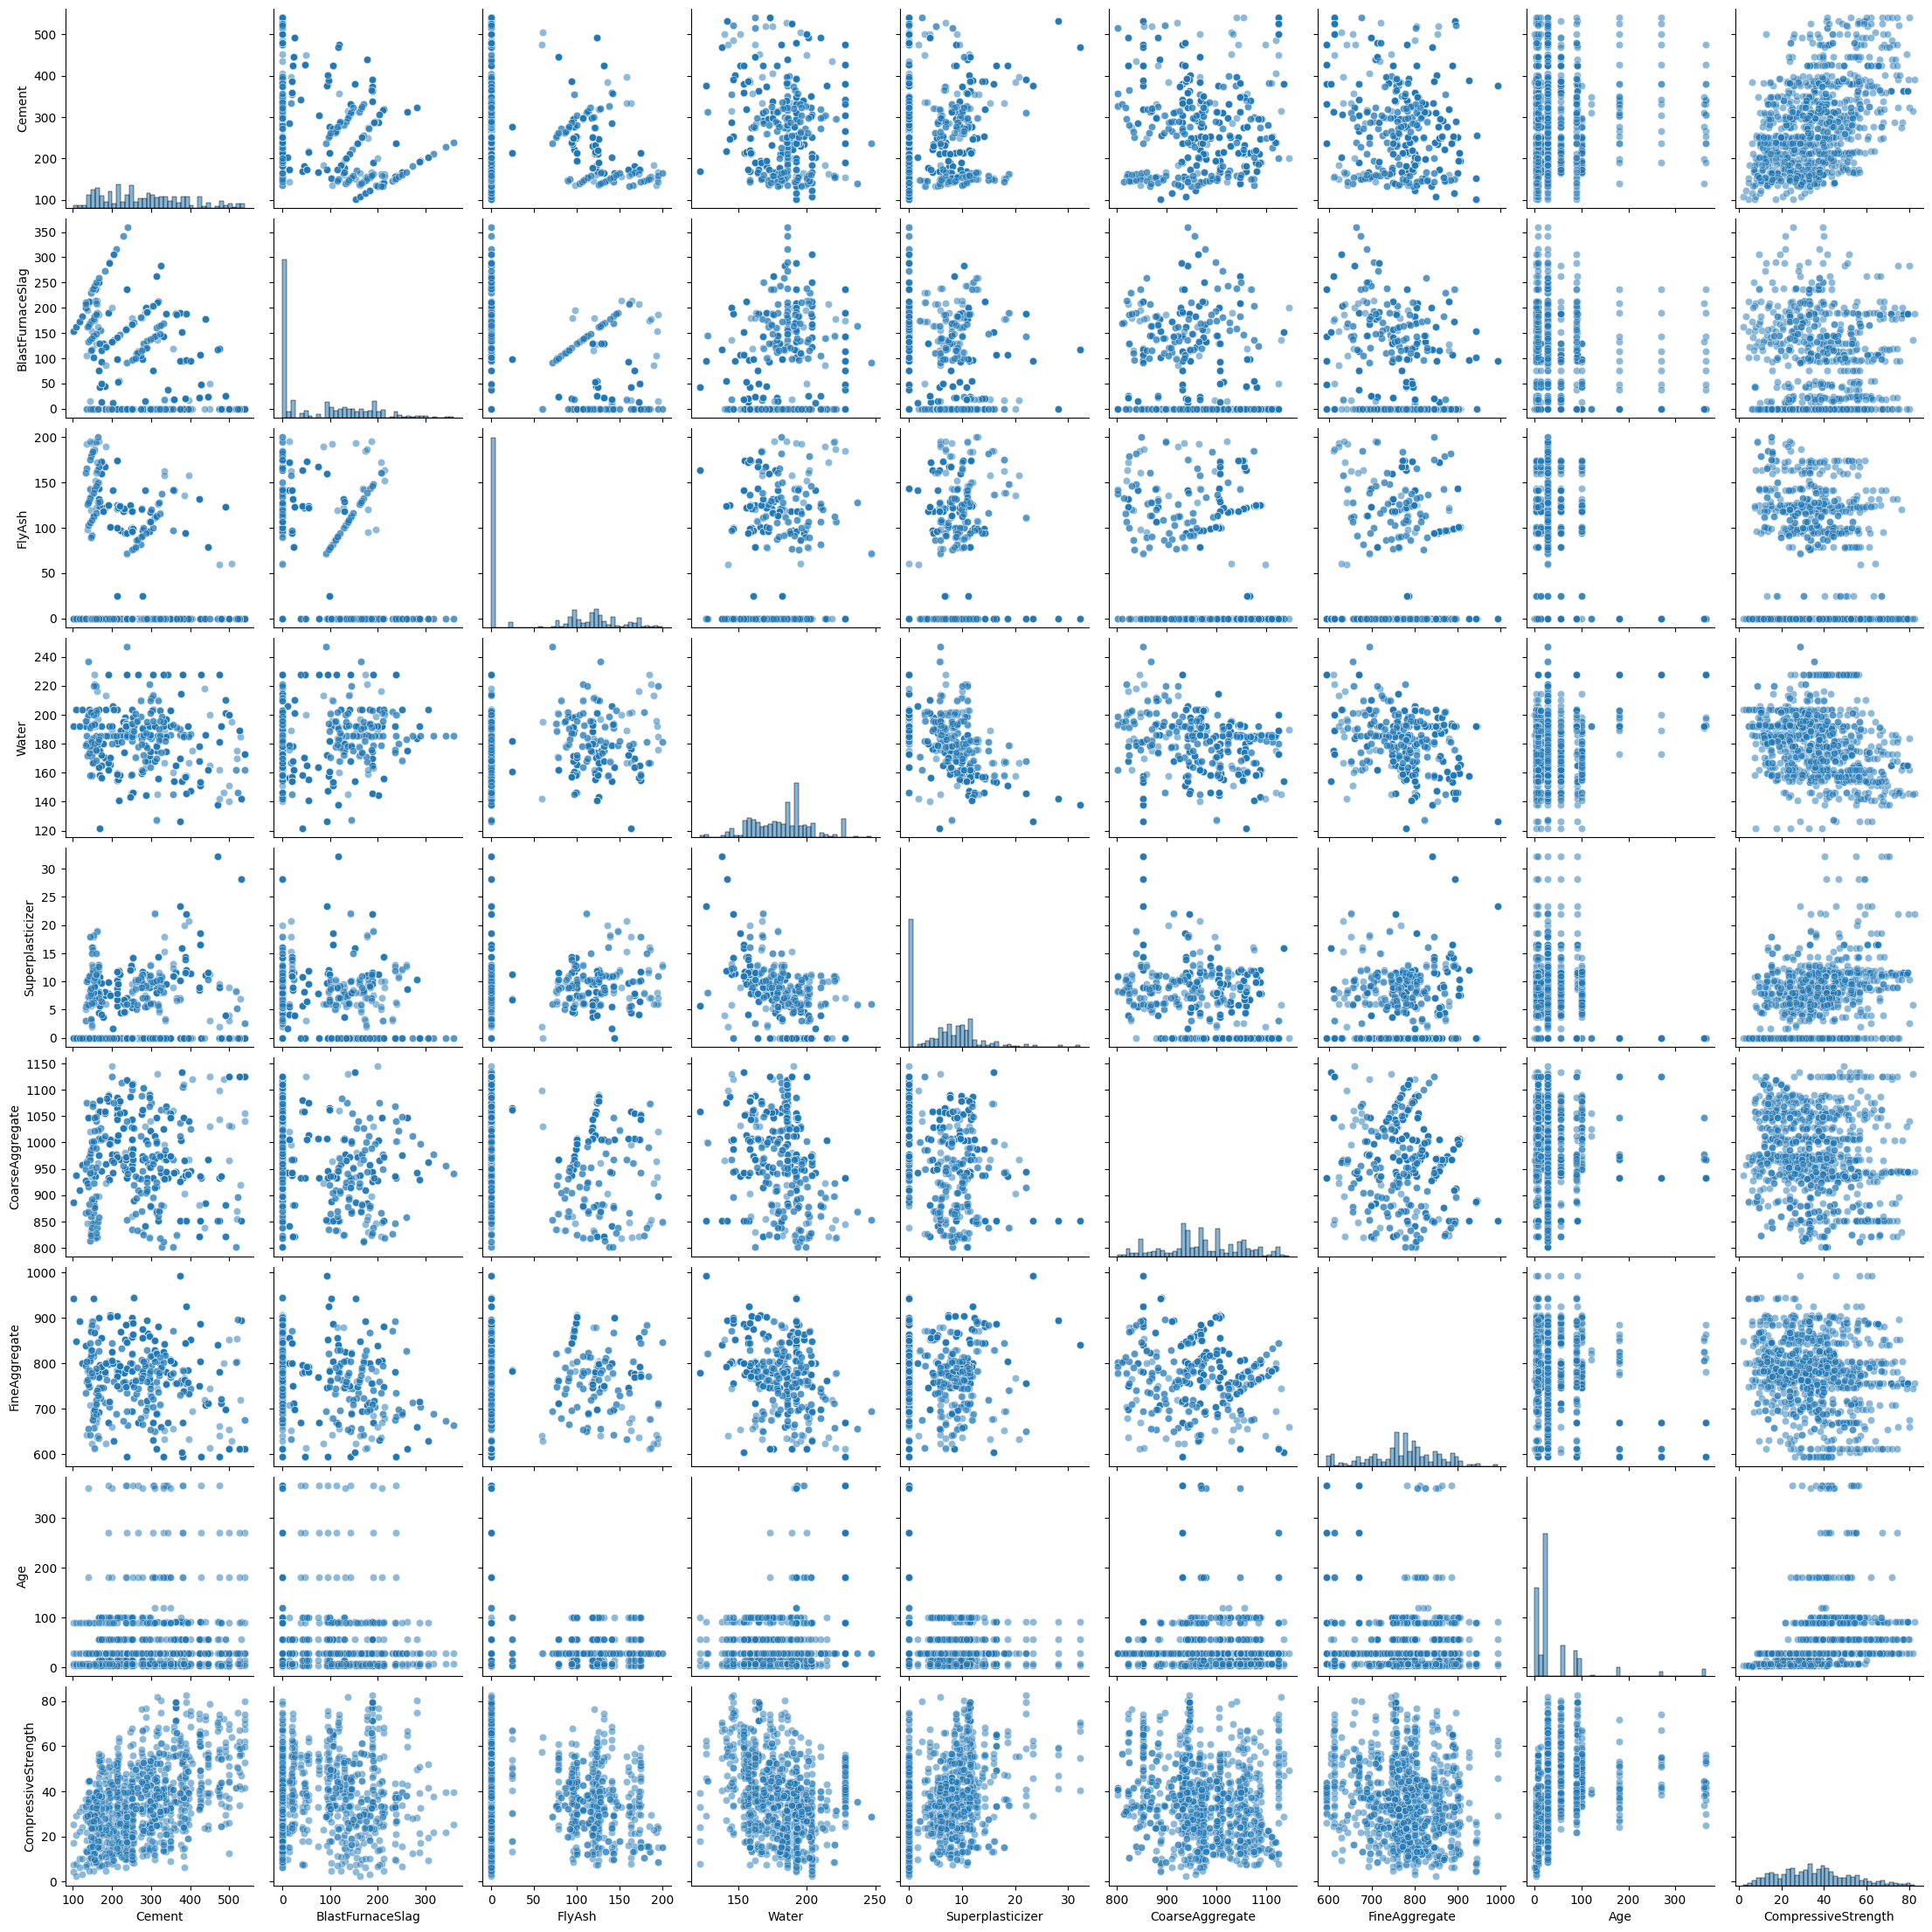

In [86]:
sns.pairplot(concrete, kind='scatter', plot_kws={'alpha': 0.5}, diag_kws={'alpha': 0.55, 'bins':40})

Text(0.5, 1.0, 'Correlation Heatmap')

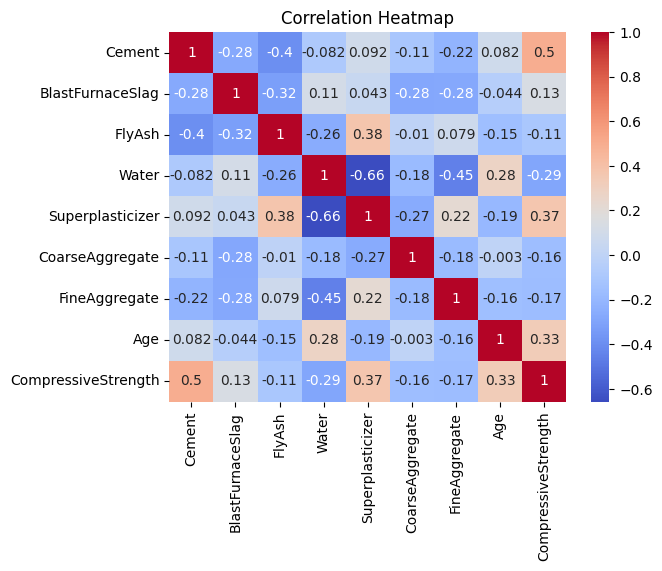

In [87]:
corr = concrete.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

## <span style="color: blue;">TRAIN TEST SPLITTING</span>

In [88]:
X = concrete.iloc[:, :-1]
y = concrete.iloc[:, -1]

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [90]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## <span style="color: blue;">MODEL BUILDING</span>

#### <span style="color: blue;">Linear Regression</span>

In [91]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

In [92]:
print(lr.coef_)
print(lr.intercept_)

[12.66761221  8.74363886  5.50282517 -3.76117067  1.58265495  0.98552943
  1.18128611  7.24859848]
35.9627791262136


In [93]:
print("Model\t\t\t RMSE \t\t MSE \t\tMAE \t\tR2")
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lr)),mean_squared_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))

Model			 RMSE 		 MSE 		MAE 		R2
LinearRegression 	 10.28 		 105.76 		8.23 		0.57


## <span style="color: blue;">PLOTTING PREDICTIONS</span>

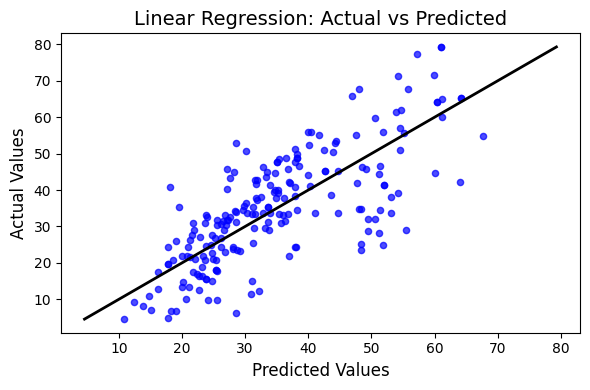

In [94]:
# Scatter plot for Linear Regression: Actual vs Predicted
plt.figure(figsize=(6, 4))
plt.scatter(
    y_pred_lr, y_test, 
    s=20, color='blue', alpha=0.7, 
    label="Predicted vs Actual"
)

# Line representing perfect predictions
plt.plot(
    [y_test.min(), y_test.max()], 
    [y_test.min(), y_test.max()], 
    color='black', lw=2, label="Perfect Fit"
)

# Add labels, title, and legend
plt.xlabel("Predicted Values", fontsize=12)
plt.ylabel("Actual Values", fontsize=12)
plt.title("Linear Regression: Actual vs Predicted", fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## <span style="color: blue;">DECISION TREES</span>

Model					 RMSE 		 MSE 		MAE 		R2
DecisionTreeRegressor 		 6.48 		42.02 		4.28 		0.83


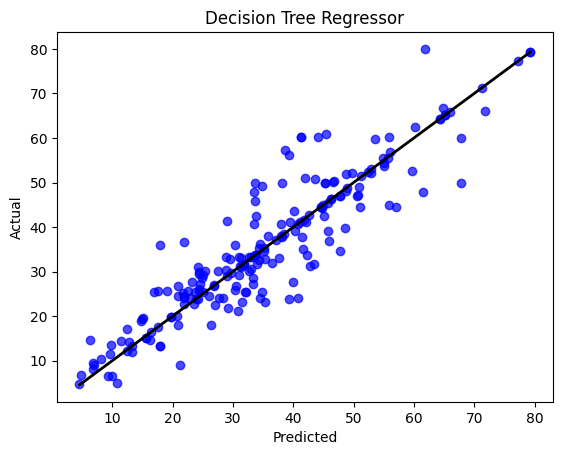

In [95]:
dtr = DecisionTreeRegressor()

dtr.fit(X_train, y_train)

y_pred_dtr = dtr.predict(X_test)

print("Model\t\t\t\t\t RMSE \t\t MSE \t\tMAE \t\tR2")
print("""DecisionTreeRegressor \t\t {:.2f} \t\t{:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_dtr)),mean_squared_error(y_test, y_pred_dtr),
            mean_absolute_error(y_test, y_pred_dtr), r2_score(y_test, y_pred_dtr)))

plt.scatter(y_test, y_pred_dtr, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'black', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Regressor')
plt.show()



## <span style="color: blue;">POLYNOMIAL</span>

In [121]:
X = concrete.iloc[:, :-1]
y = concrete.iloc[:, -1]
X_train,x_test,y_train,y_test_poly=train_test_split(X,y,train_size=0.7)
X_train


,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age
223,166.1,0.0,163.3,176.5,4.5,1058.6,780.1,100
596,170.3,155.5,0.0,185.7,0.0,1026.6,724.3,7
474,446.0,24.0,79.0,162.0,10.3,967.0,712.0,28
454,250.0,0.0,95.7,191.8,5.3,948.9,857.2,56
256,212.5,0.0,100.4,159.3,8.7,1007.8,903.6,28
...,...,...,...,...,...,...,...,...
877,296.0,0.0,107.0,221.0,11.0,819.0,778.0,28
388,385.0,0.0,136.0,158.0,20.0,903.0,768.0,28
562,382.5,0.0,0.0,185.7,0.0,1047.8,739.3,7
298,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,100


In [97]:
poly=PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_train_poly.shape

(721, 45)

In [98]:
X_train_poly

array([[1.0000000e+00, 1.3960000e+02, 2.0940000e+02, ..., 6.5108761e+05,
        7.2621000e+04, 8.1000000e+03],
       [1.0000000e+00, 3.0990000e+02, 1.4280000e+02, ..., 4.2406144e+05,
        1.8233600e+04, 7.8400000e+02],
       [1.0000000e+00, 3.0530000e+02, 2.0350000e+02, ..., 3.9816100e+05,
        1.8930000e+03, 9.0000000e+00],
       ...,
       [1.0000000e+00, 1.6500000e+02, 1.2850000e+02, ..., 5.5741156e+05,
        2.2398000e+03, 9.0000000e+00],
       [1.0000000e+00, 2.3820000e+02, 1.5880000e+02, ..., 5.3919649e+05,
        2.0560400e+04, 7.8400000e+02],
       [1.0000000e+00, 1.9860000e+02, 1.3240000e+02, ..., 6.8145025e+05,
        2.4765000e+03, 9.0000000e+00]])

In [99]:
model = LinearRegression()
model.fit(X_train_poly, y_train)
a=model.coef_
a

array([-6.82417883e-10,  2.57375478e+00,  2.30529061e+00,  1.66308438e+00,
        1.46072978e+01,  3.52055939e+01,  2.53801750e+00,  3.55459993e+00,
        4.18749462e-02, -3.43651904e-04, -5.17533702e-04, -1.92581277e-04,
       -4.75858181e-03, -1.05634873e-02, -6.02264561e-04, -9.25556492e-04,
        2.98954963e-04, -2.60524356e-04,  3.88095104e-05, -4.31420509e-03,
       -1.06356351e-02, -6.04852672e-04, -8.04114747e-04,  6.73966561e-04,
        8.61192135e-05, -4.76342016e-03, -1.74731240e-02, -2.67094247e-04,
       -4.69710203e-04,  7.43180192e-04, -9.21843650e-03, -4.06559326e-02,
       -5.15116493e-03, -5.54777754e-03, -2.90531633e-04, -5.88624954e-02,
       -1.23357647e-02, -1.30455858e-02,  3.57751622e-03, -2.98096177e-04,
       -9.39156286e-04, -8.03246680e-05, -7.92478618e-04,  3.23260253e-04,
       -6.02049972e-04])

In [100]:
y_train_pred=model.predict(X_train_poly)

In [101]:
X_test_poly = poly.fit_transform(X_test)
X_test_poly.shape

(206, 45)

In [102]:
y_test_pred=model.predict(X_test_poly)

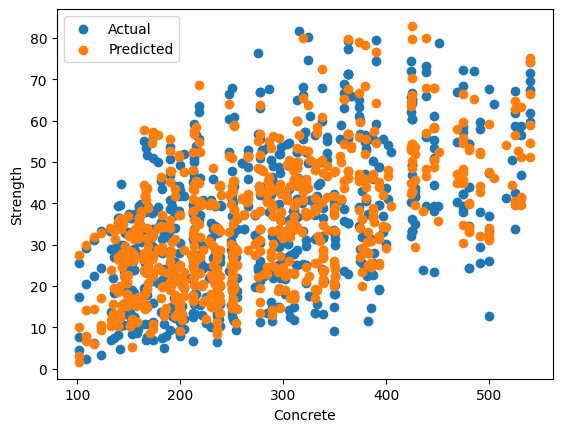

In [103]:
plt.scatter(X_train["Cement"],y_train)
plt.scatter(X_train["Cement"],y_train_pred)
plt.xlabel("Concrete")
plt.ylabel("Strength")
plt.legend(["Actual","Predicted"])

In [122]:
plt.scatter(X_test["Cement"],y_test_poly)
plt.scatter(X_test["Cement"],y_test_pred)
plt.xlabel("conc")
plt.ylabel("strength")
plt.legend(["Actual","Predicted"])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

## <span style="color: blue;">COMPARISON</span>

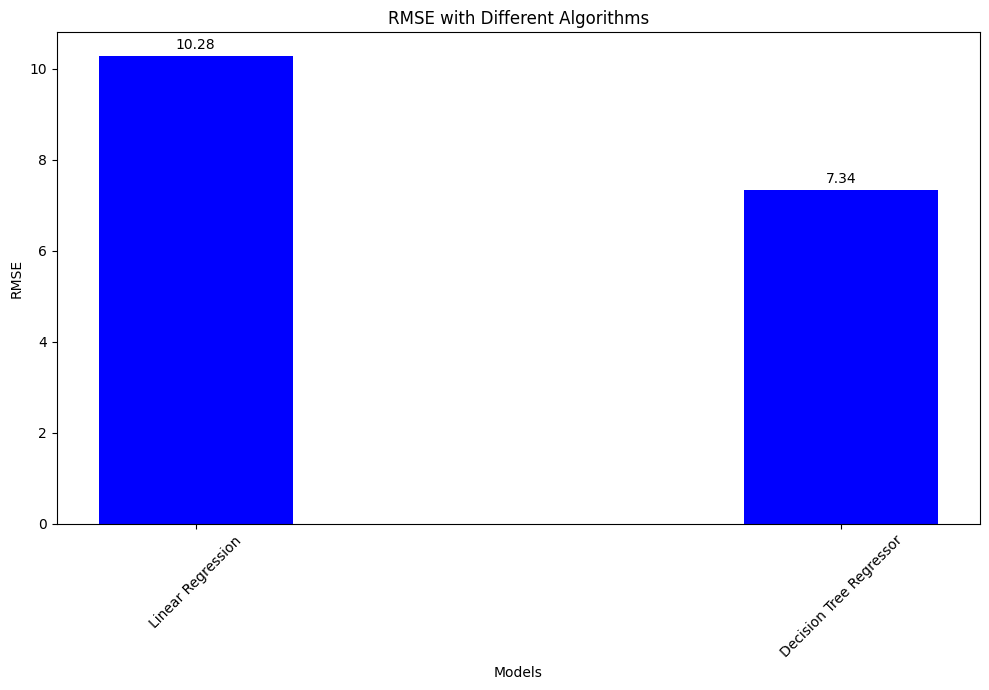

In [ ]:
models = [lr, dtr]  # Replace with your actual models (Linear Regression, Decision Tree Regressor)
names = ["Linear Regression", "Decision Tree Regressor"]  # Update to match the models
rmses = []

# Replace y_test and X_test with your actual test data
for model in models:
    rmses.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

x = np.arange(len(names)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10, 7))
rects = ax.bar(x, rmses, width, color = 'blue')

ax.set_ylabel('RMSE')
ax.set_xlabel('Models')
ax.set_title('RMSE with Different Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=45)

# Add values to each bar
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Offset for the text
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects)
fig.tight_layout()
plt.show()

## <span style="color: blue;">INTERFACE</span>

## <span style="color: red;">EXPLAIN THE DATABASE</span>